In [31]:
!pip install scipy statsmodels --upgrade

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

%matplotlib inline

In [128]:
#Set the Random Seed for Reproducibility 
np.random.seed(42)

# Import Data

In [116]:
df_ts = pd.read_csv('../data/USAverage_Energy_CO2_1970to2021.csv')

In [118]:
# setting year as the index 
df_ts.set_index('Year', inplace=True)

# Convert the index to a DatetimeIndex because the 
# that's the way seasonal_decompose wants it
df_ts.index = pd.to_datetime(df_ts.index, format='%Y')

# double checking 
df_ts.head()

,CO2_Value,Coal_Value,Natural_Gas_Value,Nuclear_Energy_Value,Petroleum_Energy_Value,Renewable_Energy_Value
Year,,,,,,
1970-01-01,21.733333,240566.529412,425347.294118,4693.098039,578433.607843,79804.333333
1971-01-01,21.880392,227513.745098,438534.254902,8096.843137,598852.058824,83572.745098
1972-01-01,22.996078,237441.764706,444754.823529,11446.098039,645473.647059,85921.686275
1973-01-01,23.625490,254119.980392,443045.960784,17846.627451,682471.156863,86489.039216
1974-01-01,22.750980,248058.960784,426069.764706,24942.843137,655306.156863,92977.490196


# Time Series Analysis

## Plots to gain some insights regarding Data Trends

In [36]:
# Code modified from code written by Matthew Garton.

def plot_series(df, cols=None, title='Title', xlab=None, ylab=None, steps=1):
    
    # Set figure size to be (18, 9).
    plt.figure(figsize=(18,9))
    
    # Iterate through each column name.
    for col in cols:
            
        # Generate a line plot of the column name.
        # You only have to specify Y, since our
        # index will be a datetime index.
        plt.plot(df[col])
        
    # Generate title and labels.
    plt.title(title, fontsize=26)
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
    
    # Enlarge tick marks.
    plt.yticks(fontsize=18)
    plt.xticks(df.index[0::steps], fontsize=18);

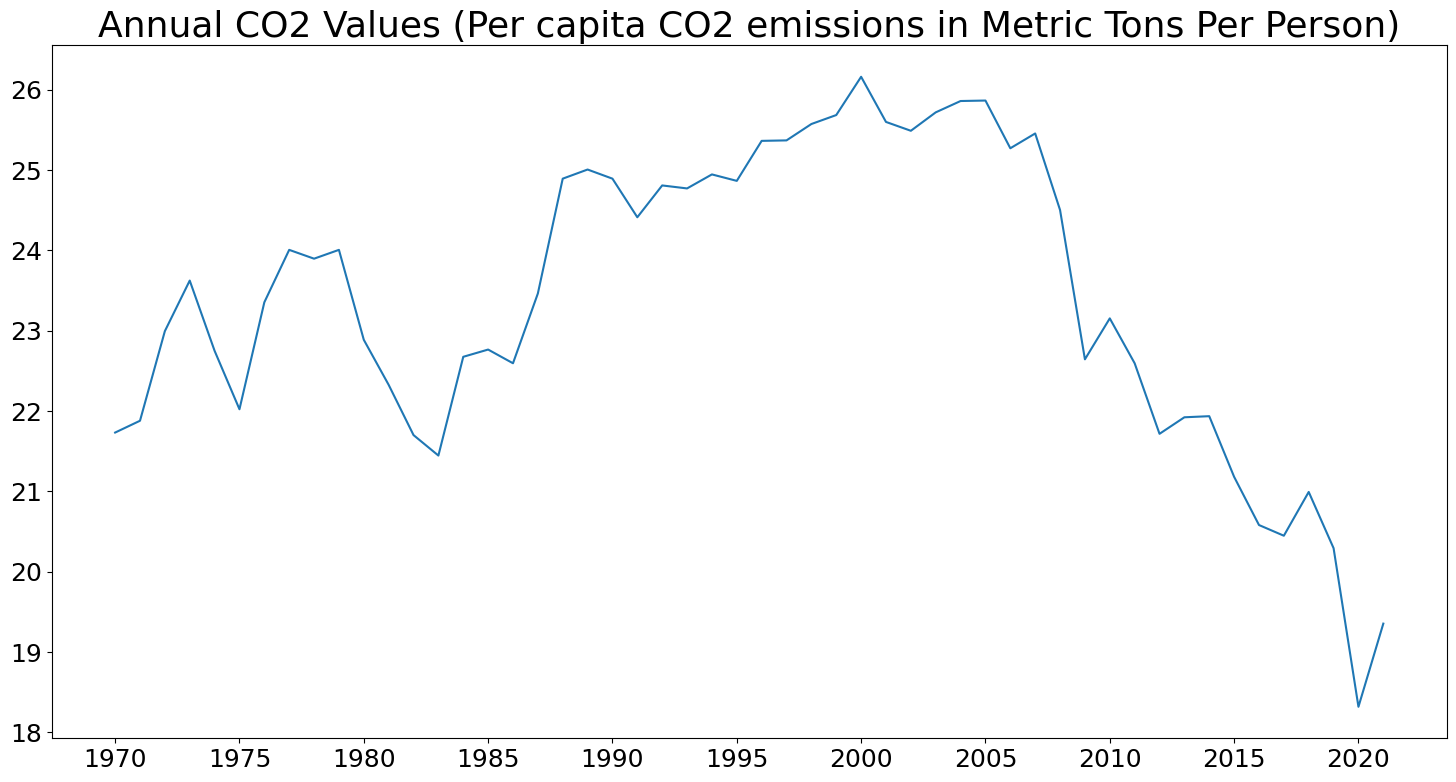

In [37]:
# Generate a time plot of our CO2 data.
plot_series(df_ts, ['CO2_Value'], title='Annual CO2 Values (Per capita CO2 emissions in Metric Tons Per Person)', steps = 5)

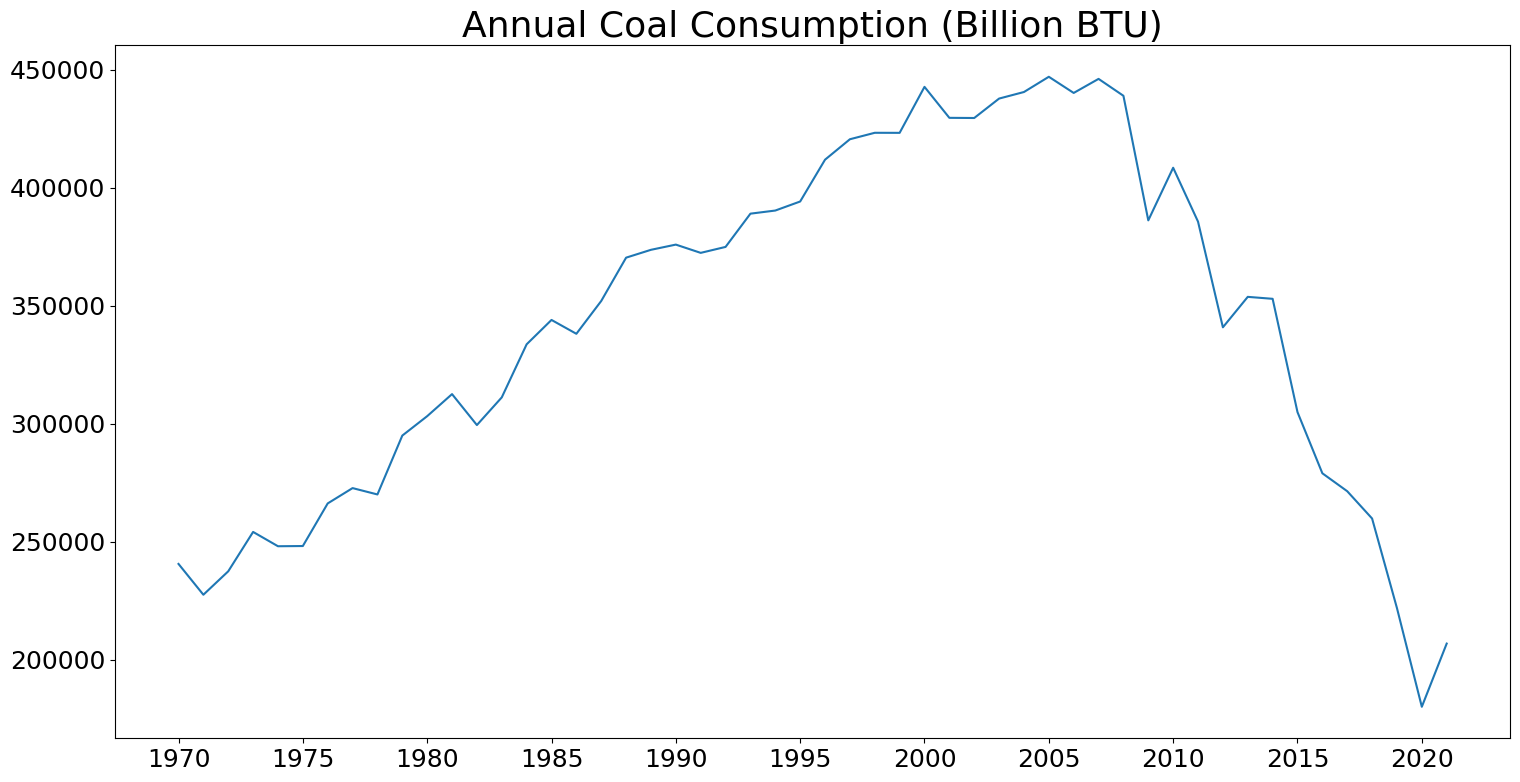

In [38]:
# Generate a time plot of our Coal data.
plot_series(df_ts, ['Coal_Value'], title='Annual Coal Consumption (Billion BTU)', steps = 5)

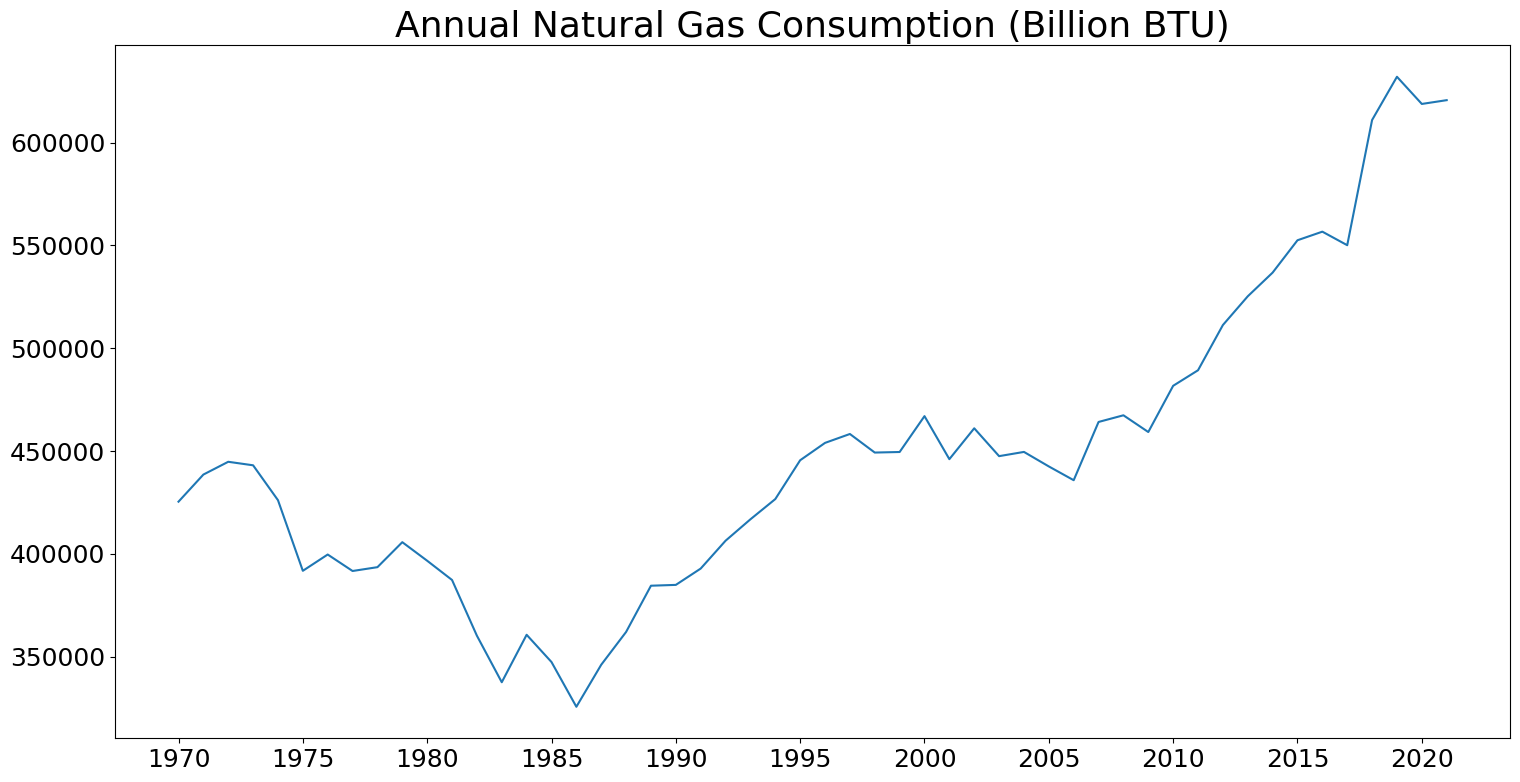

In [39]:
# Generate a time plot of our Natural Gas data.
plot_series(df_ts, ['Natural_Gas_Value'], title='Annual Natural Gas Consumption (Billion BTU)', steps = 5)

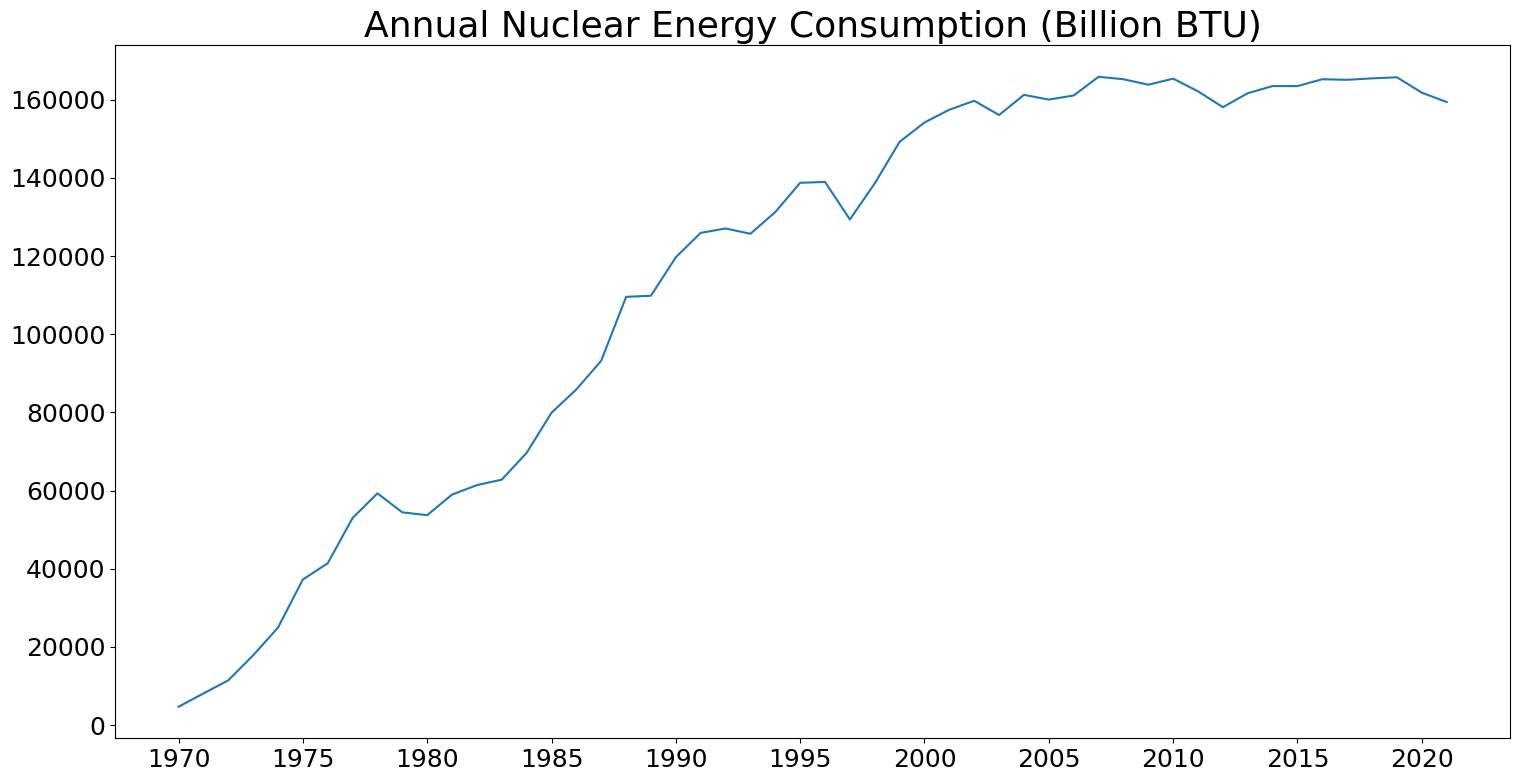

In [40]:
# Generate a time plot of our Nuclear Energy data.
plot_series(df_ts, ['Nuclear_Energy_Value'], title='Annual Nuclear Energy Consumption (Billion BTU)', steps = 5)

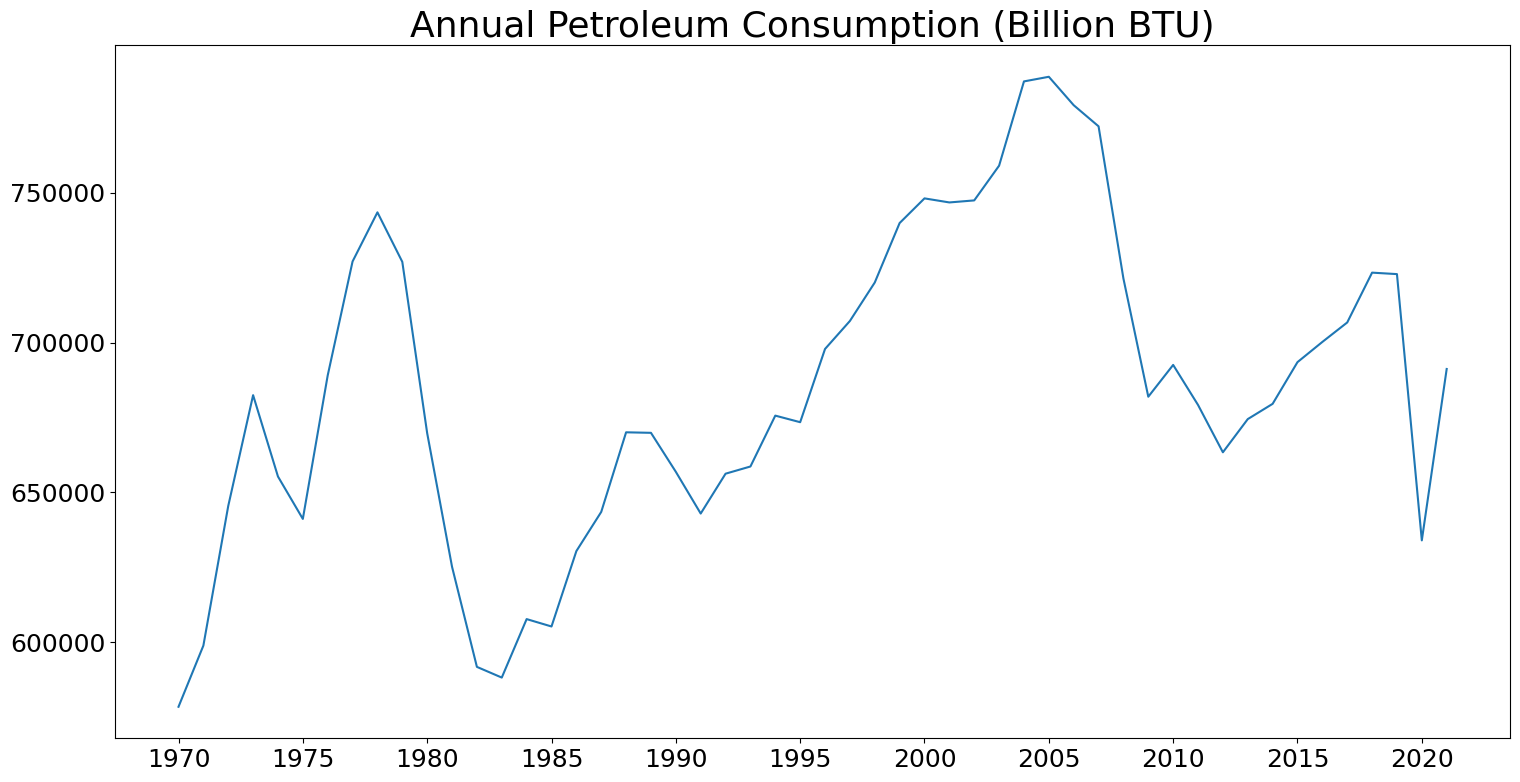

In [41]:
# Generate a time plot of our Petroleum data.
plot_series(df_ts, ['Petroleum_Energy_Value'], title='Annual Petroleum Consumption (Billion BTU)', steps = 5)

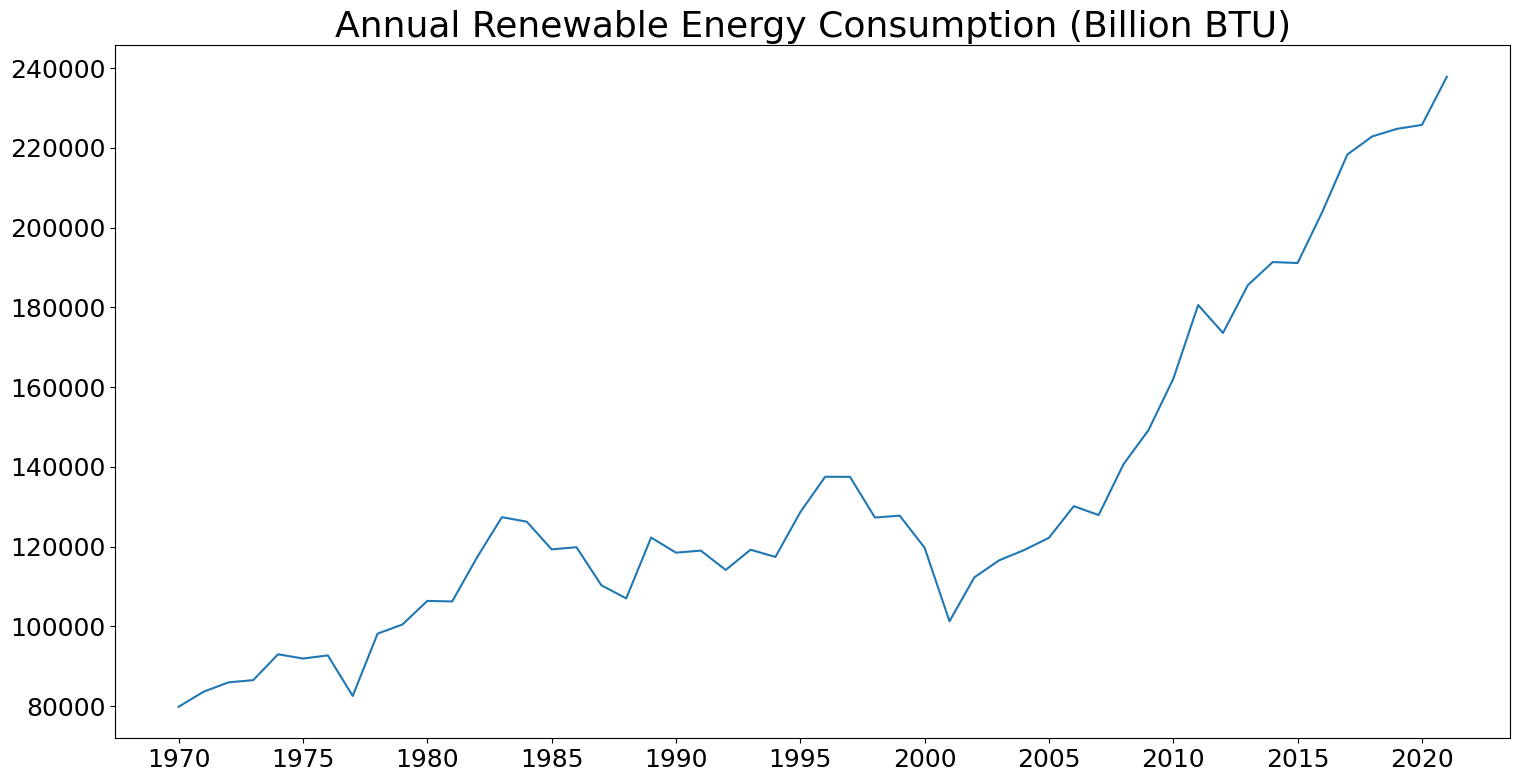

In [42]:
# Generate a time plot of our Renewable Energy data.
plot_series(df_ts, ['Renewable_Energy_Value'], title='Annual Renewable Energy Consumption (Billion BTU)', steps = 5)

## Modeling Section

### Differentiate a couple times for each of the values to run through our model 

In [43]:
df_ts.columns

Index(['CO2_Value', 'Coal_Value', 'Natural_Gas_Value', 'Nuclear_Energy_Value',
       'Petroleum_Energy_Value', 'Renewable_Energy_Value'],
      dtype='object')

In [44]:
# Create first_diff and second_diff columns in dataframe for CO2
df_ts['first_diff_CO2_Value'] = df_ts['CO2_Value'].diff()
df_ts['second_diff_CO2_Value'] = (df_ts['CO2_Value'].diff()).diff()

In [45]:
# Create first_diff and second_diff columns in dataframe for Coal
df_ts['first_diff_Coal_Value'] = df_ts['Coal_Value'].diff()
df_ts['second_diff_Coal_Value'] = (df_ts['Coal_Value'].diff()).diff()

In [46]:
# Create first_diff and second_diff columns in dataframe for Natural Gas
df_ts['first_diff_Natural_Gas_Value'] = df_ts['Natural_Gas_Value'].diff()
df_ts['second_diff_Natural_Gas_Value'] = (df_ts['Natural_Gas_Value'].diff()).diff()

In [47]:
# Create first_diff and second_diff columns in dataframe for Nuclear Energy
df_ts['first_diff_Nuclear_Energy_Value'] = df_ts['Nuclear_Energy_Value'].diff()
df_ts['second_diff_Nuclear_Energy_Value'] = (df_ts['Nuclear_Energy_Value'].diff()).diff()

In [48]:
# Create first_diff and second_diff columns in dataframe for Petroleum
df_ts['first_diff_Petroleum_Energy_Value'] = df_ts['Petroleum_Energy_Value'].diff()
df_ts['second_diff_Petroleum_Energy_Value'] = (df_ts['Petroleum_Energy_Value'].diff()).diff()

In [49]:
# Create first_diff and second_diff columns in dataframe for Renewable Energy
df_ts['first_diff_Renewable_Energy_Value'] = df_ts['Renewable_Energy_Value'].diff()
df_ts['second_diff_Renewable_Energy_Value'] = (df_ts['Renewable_Energy_Value'].diff()).diff()

### Examining Diff Plots 

#### CO2 Plots

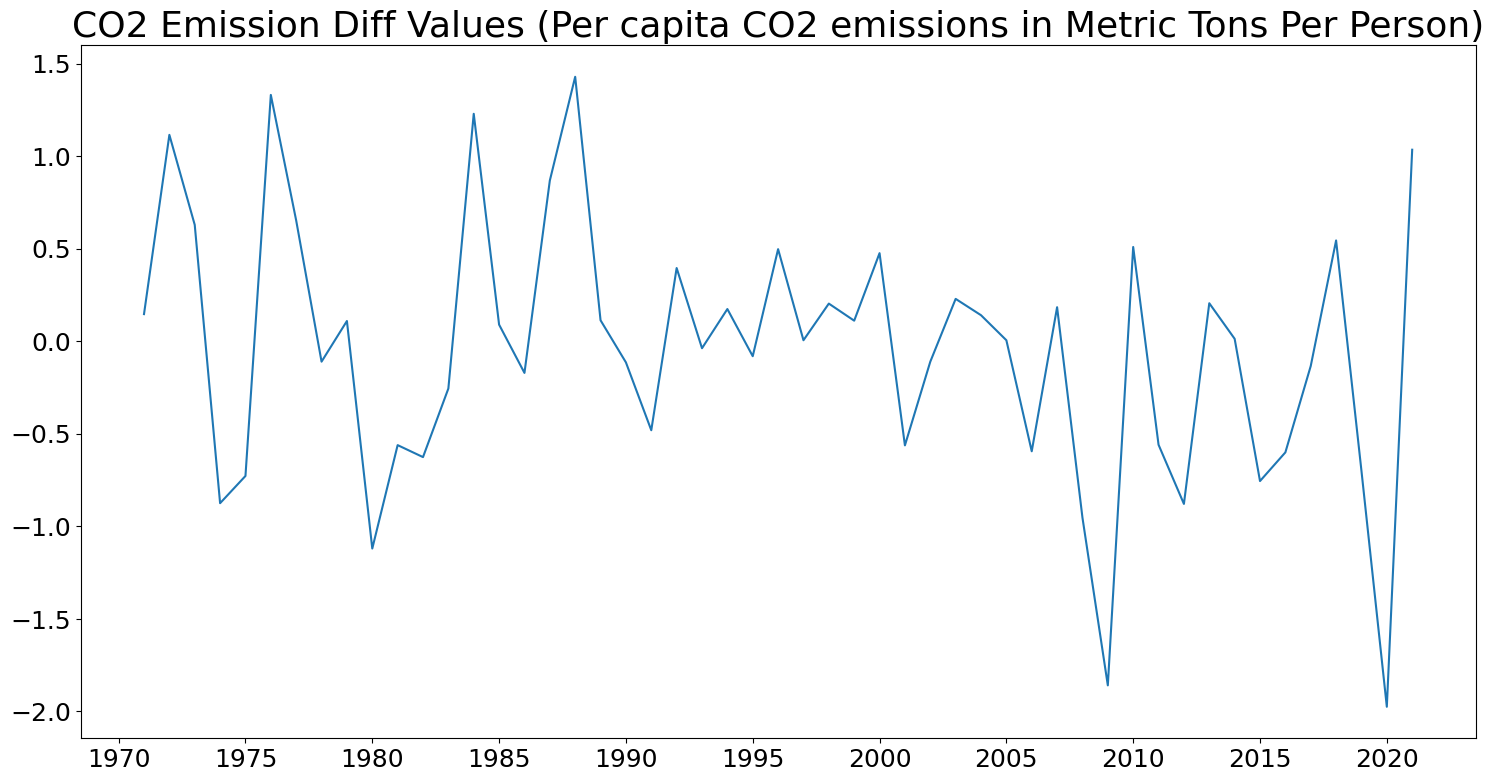

In [52]:
plot_series(df_ts, ['first_diff_CO2_Value'], title='CO2 Emission Diff Values (Per capita CO2 emissions in Metric Tons Per Person)', steps = 5)

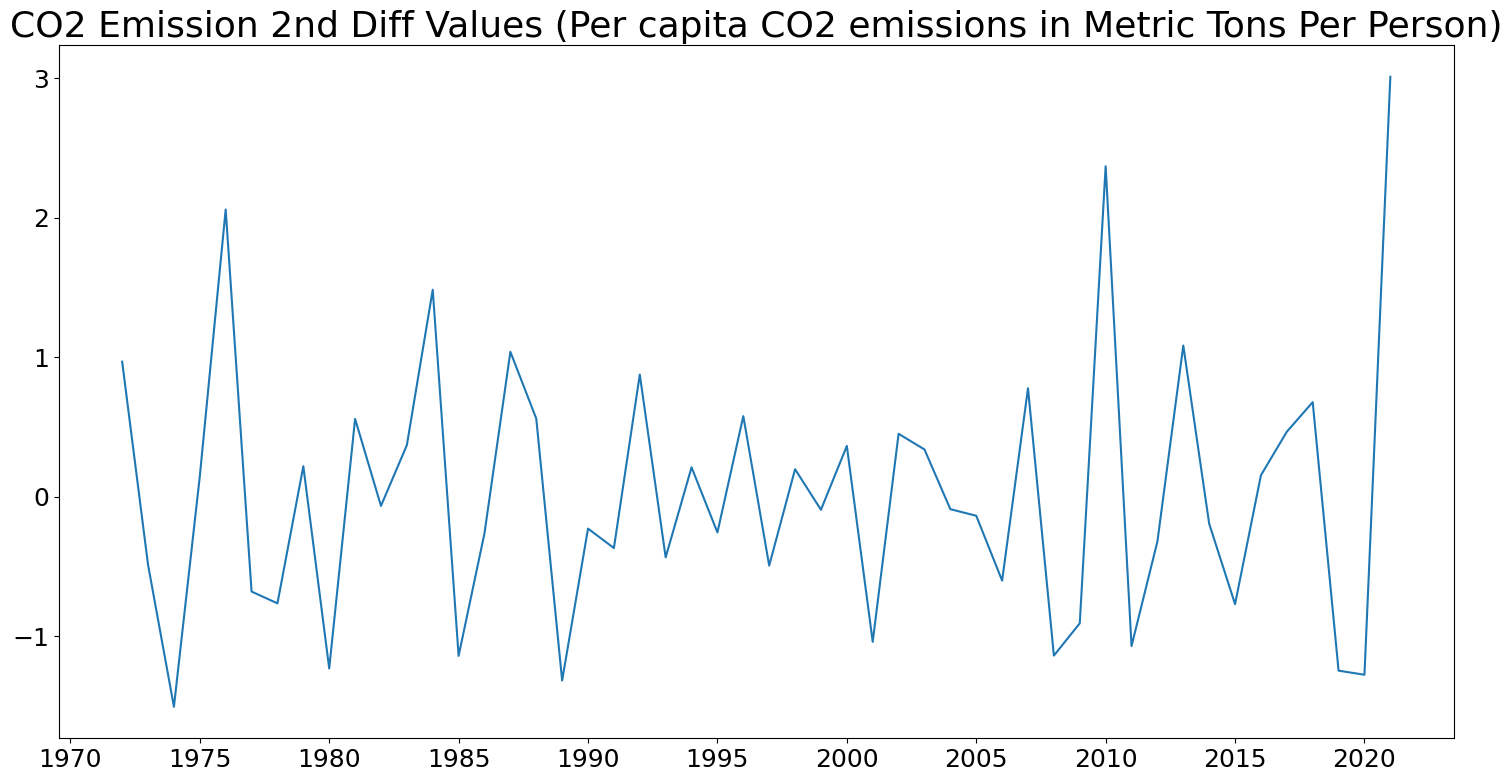

In [53]:
plot_series(df_ts, ['second_diff_CO2_Value'], title='CO2 Emission 2nd Diff Values (Per capita CO2 emissions in Metric Tons Per Person)', steps = 5)

#### Energy Plots

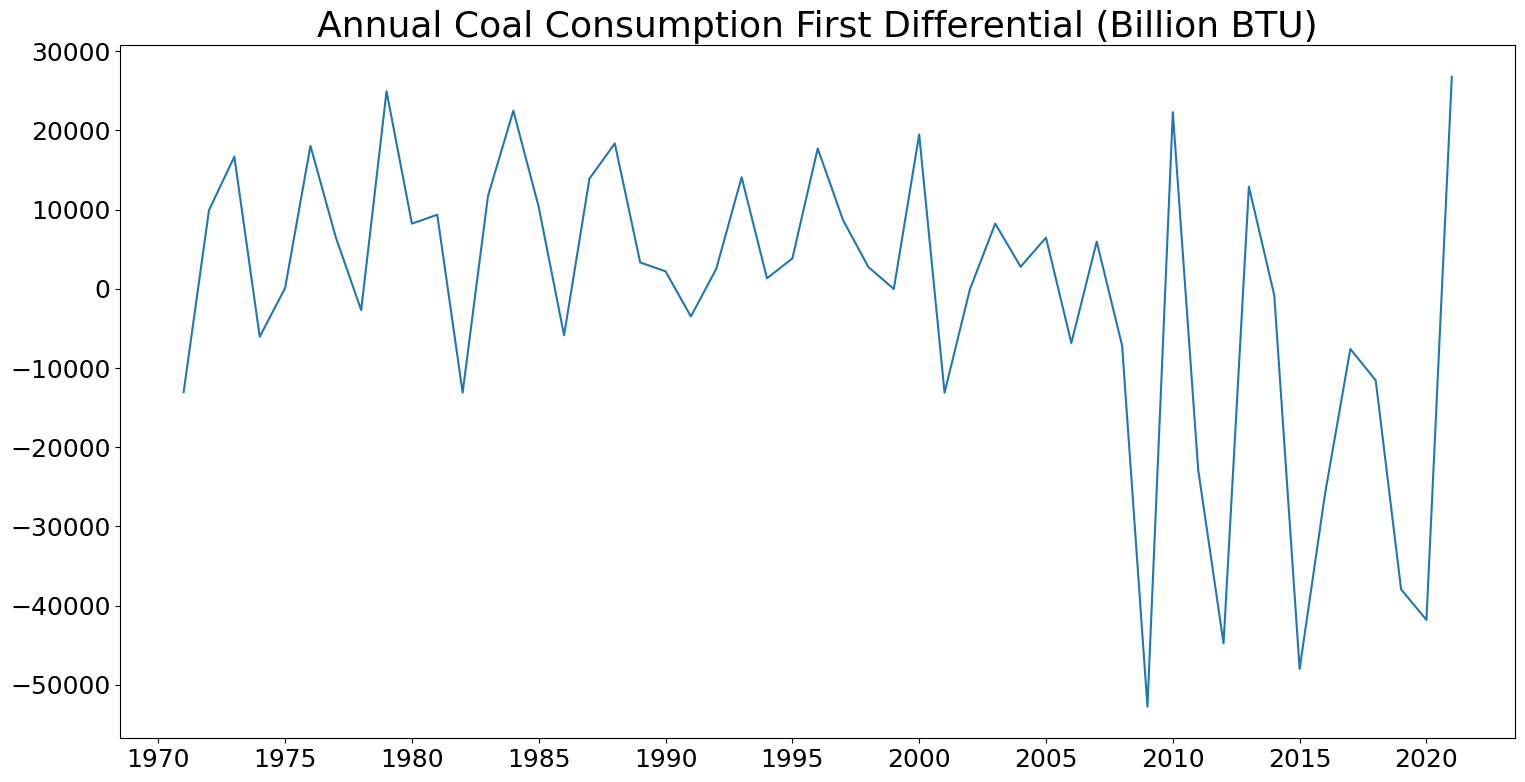

In [54]:
plot_series(df_ts, ['first_diff_Coal_Value'], title='Annual Coal Consumption First Differential (Billion BTU)', steps = 5)

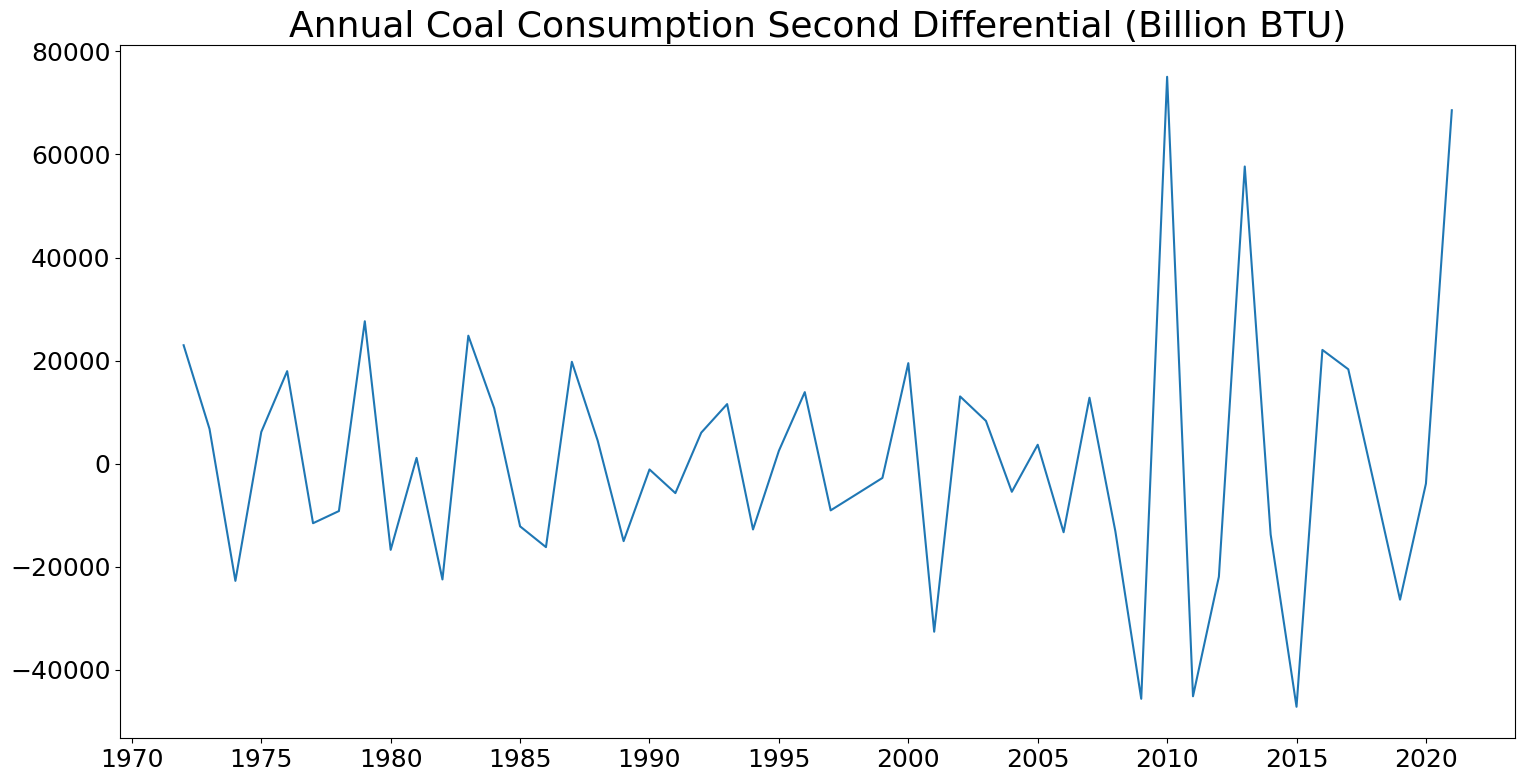

In [55]:
plot_series(df_ts, ['second_diff_Coal_Value'], title='Annual Coal Consumption Second Differential (Billion BTU)', steps = 5)

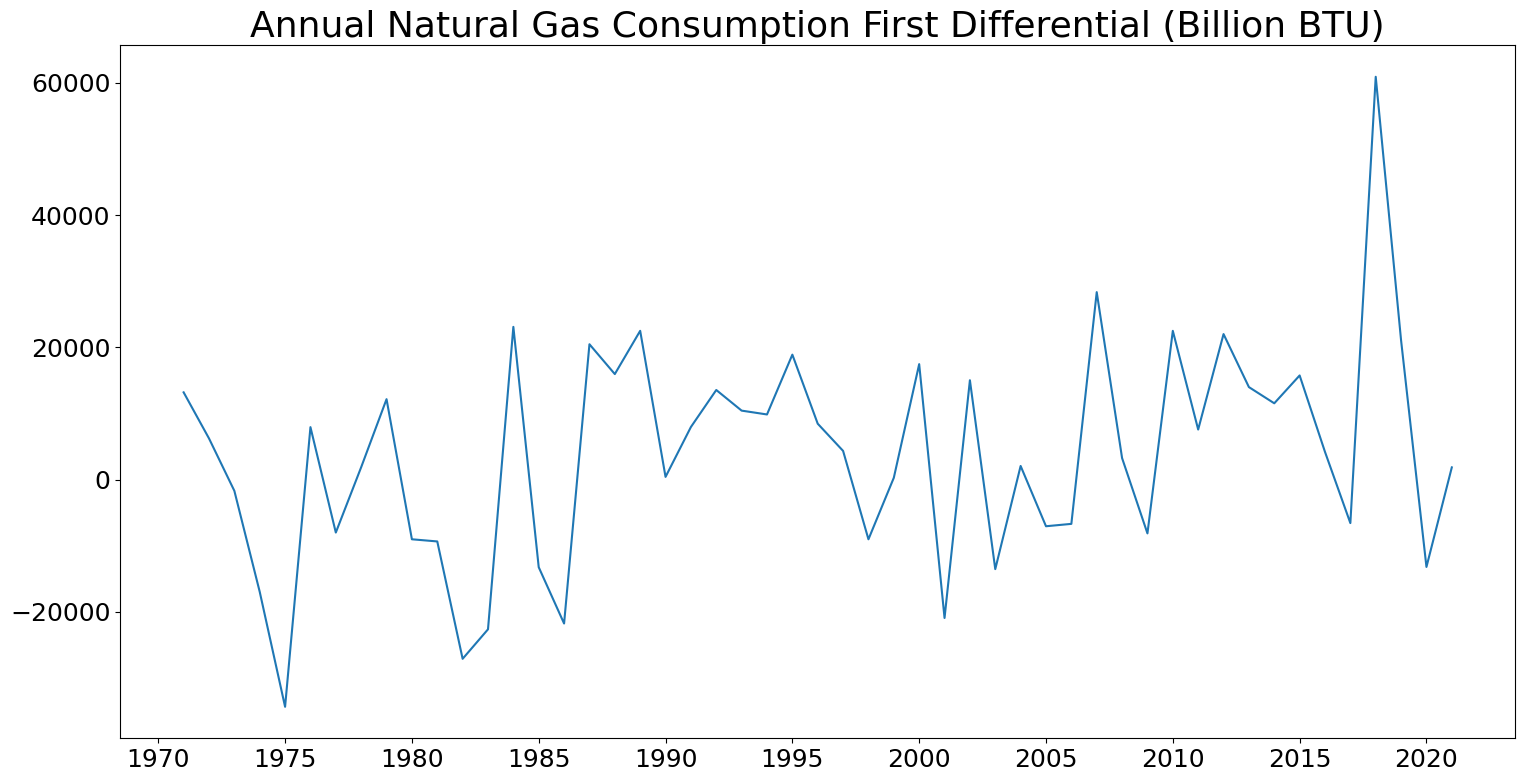

In [56]:
plot_series(df_ts, ['first_diff_Natural_Gas_Value'], title='Annual Natural Gas Consumption First Differential (Billion BTU)', steps = 5)

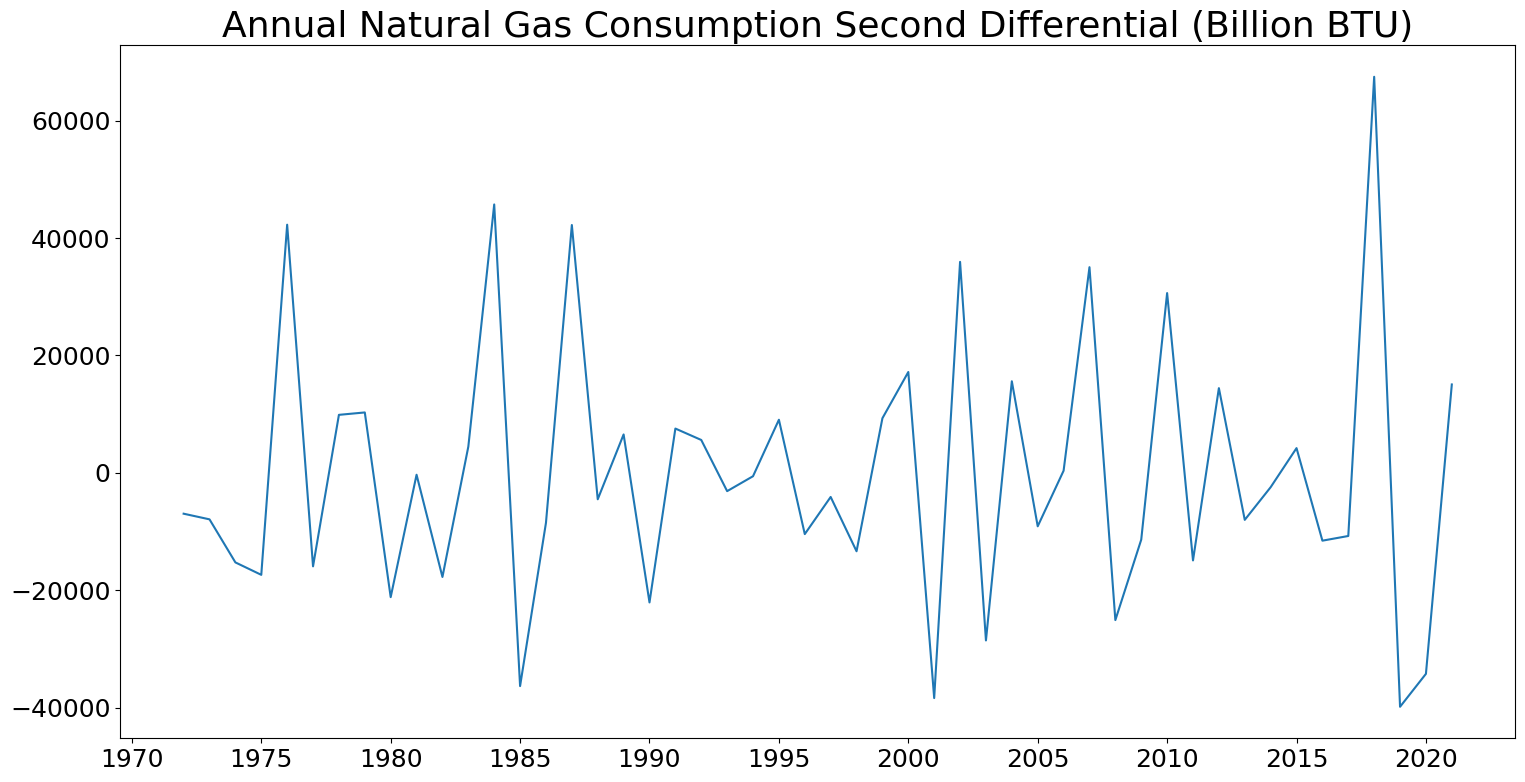

In [57]:
plot_series(df_ts, ['second_diff_Natural_Gas_Value'], title='Annual Natural Gas Consumption Second Differential (Billion BTU)', steps = 5)

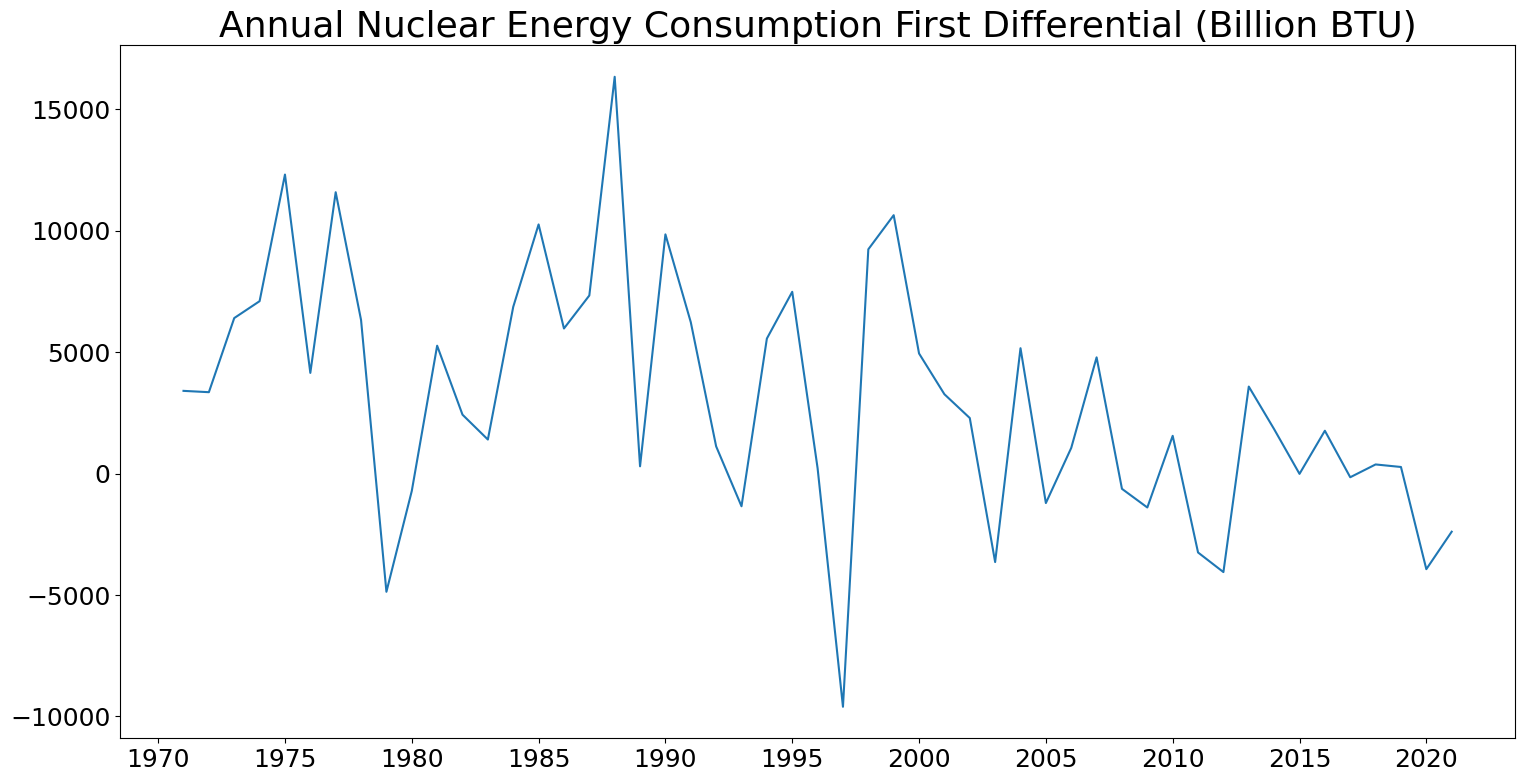

In [58]:
plot_series(df_ts, ['first_diff_Nuclear_Energy_Value'], title='Annual Nuclear Energy Consumption First Differential (Billion BTU)', steps = 5)

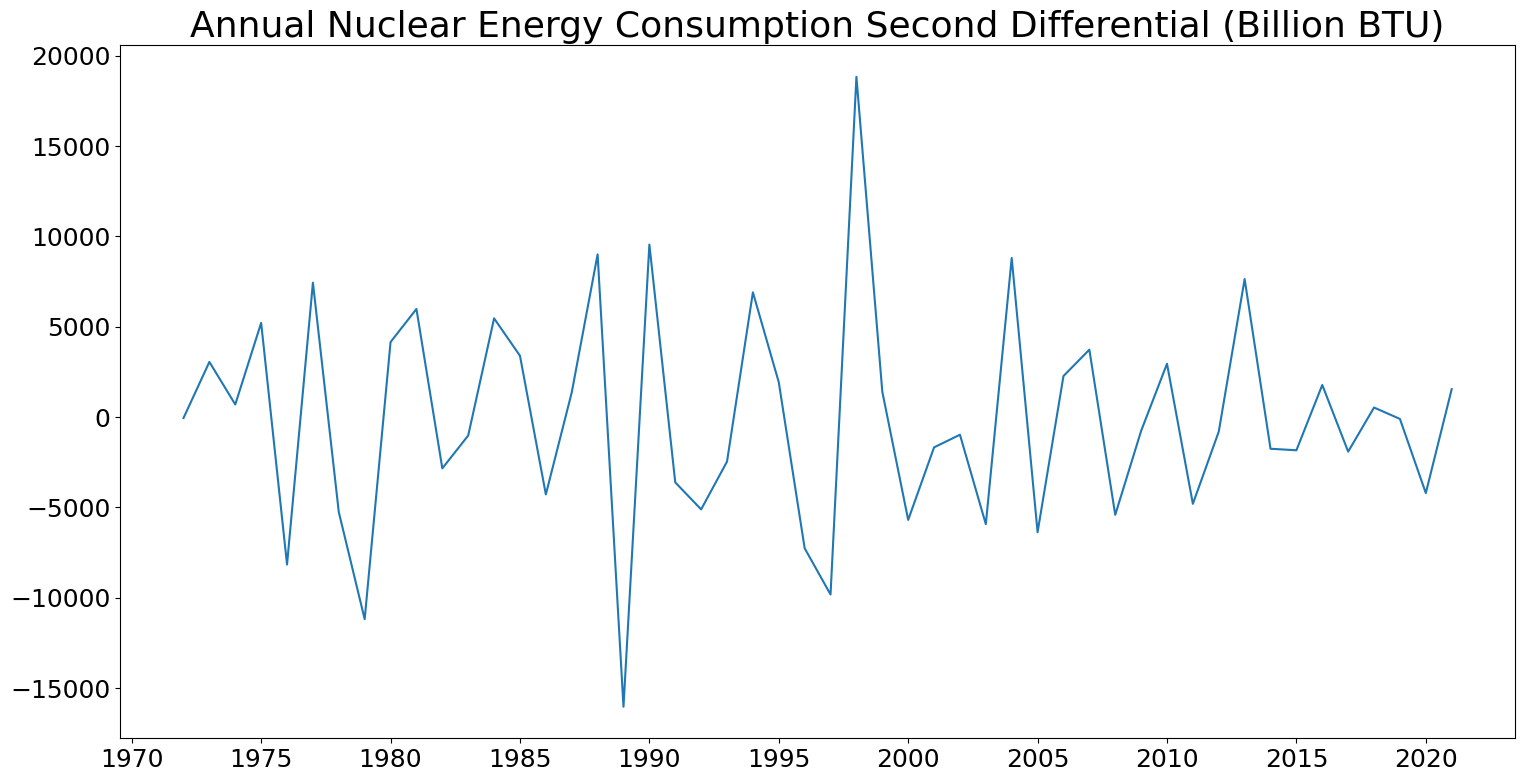

In [59]:
plot_series(df_ts, ['second_diff_Nuclear_Energy_Value'], title='Annual Nuclear Energy Consumption Second Differential (Billion BTU)', steps = 5)

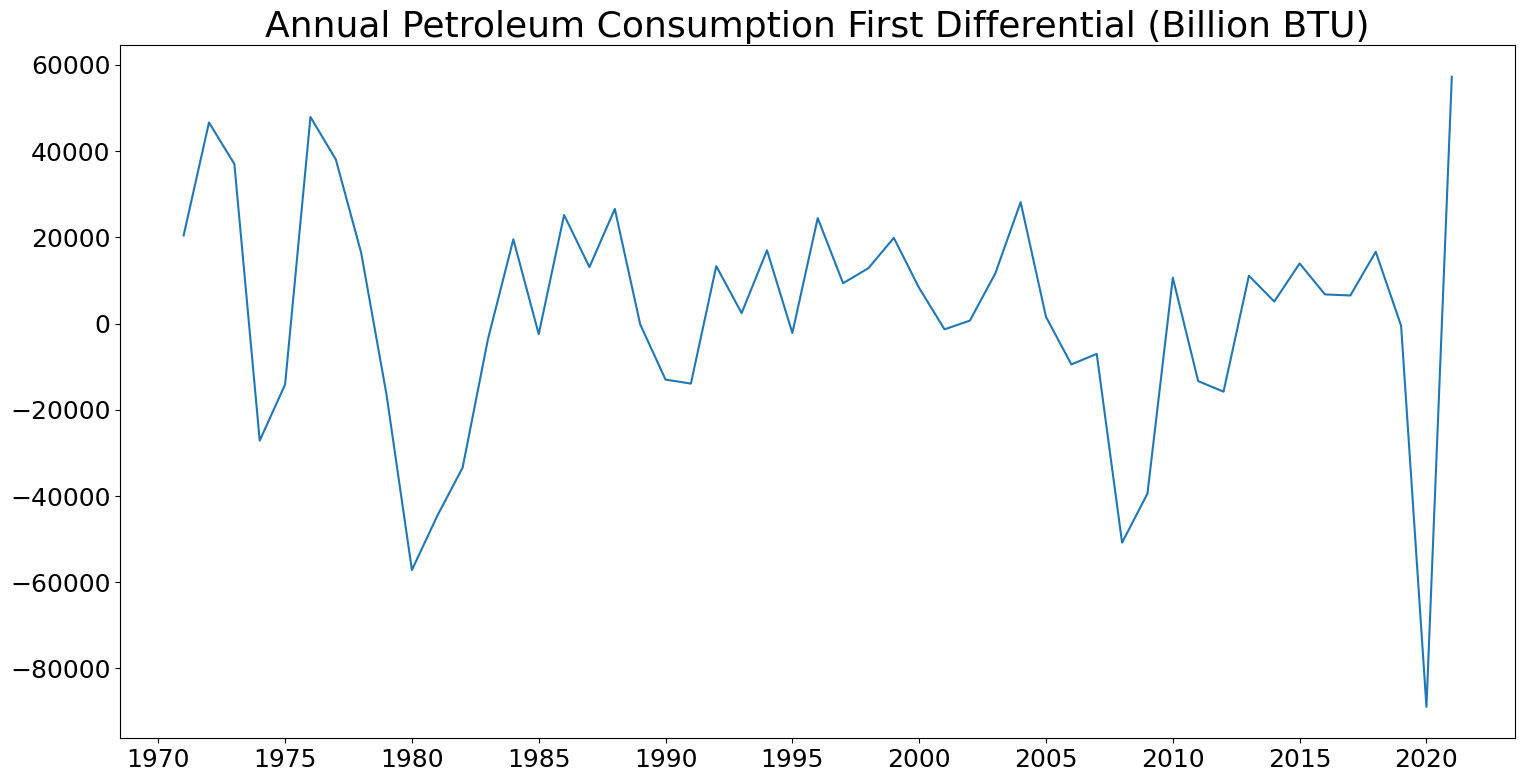

In [60]:
plot_series(df_ts, ['first_diff_Petroleum_Energy_Value'], title='Annual Petroleum Consumption First Differential (Billion BTU)', steps = 5)


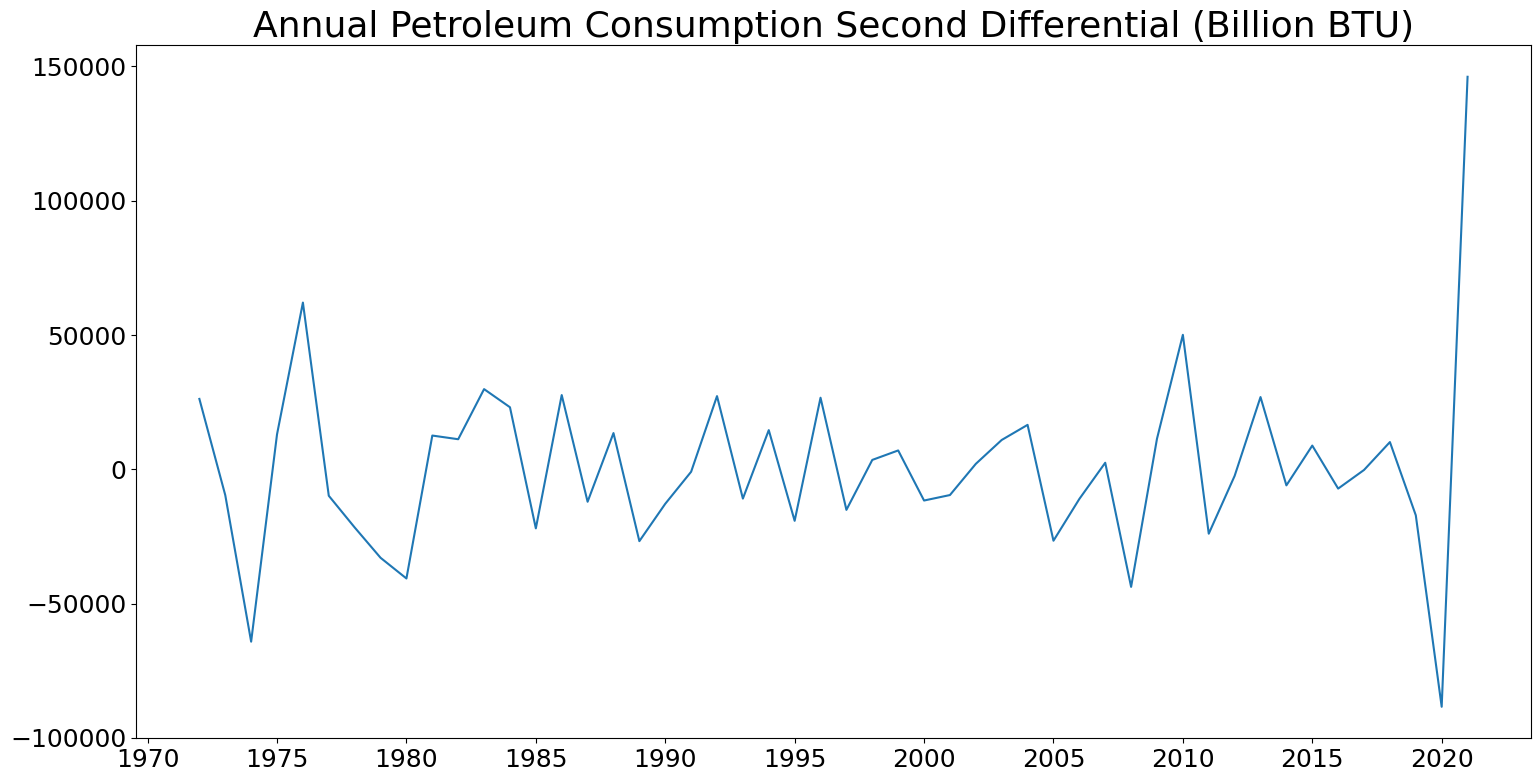

In [61]:
plot_series(df_ts, ['second_diff_Petroleum_Energy_Value'], title='Annual Petroleum Consumption Second Differential (Billion BTU)', steps = 5)

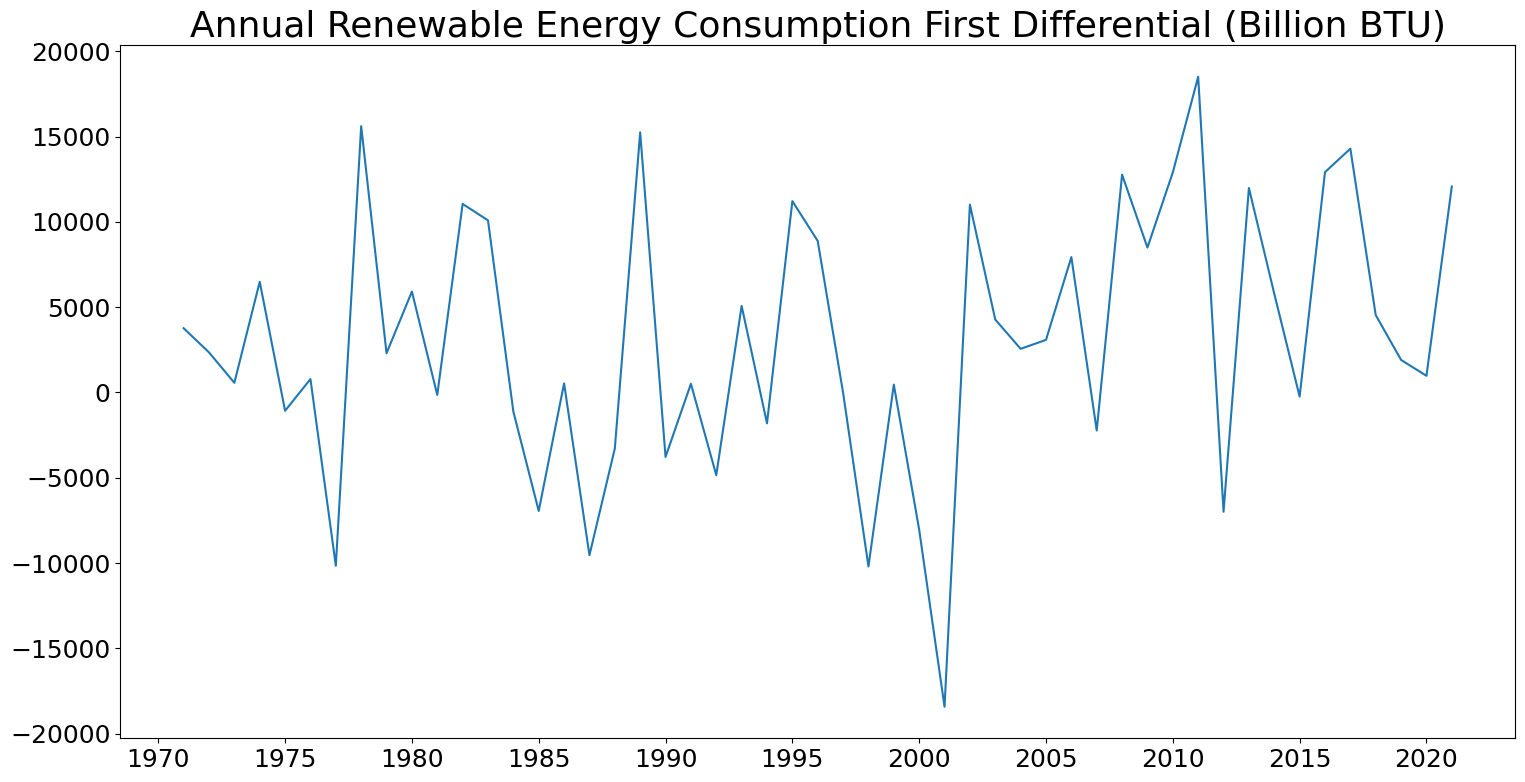

In [62]:
plot_series(df_ts, ['first_diff_Renewable_Energy_Value'], title='Annual Renewable Energy Consumption First Differential (Billion BTU)', steps = 5)


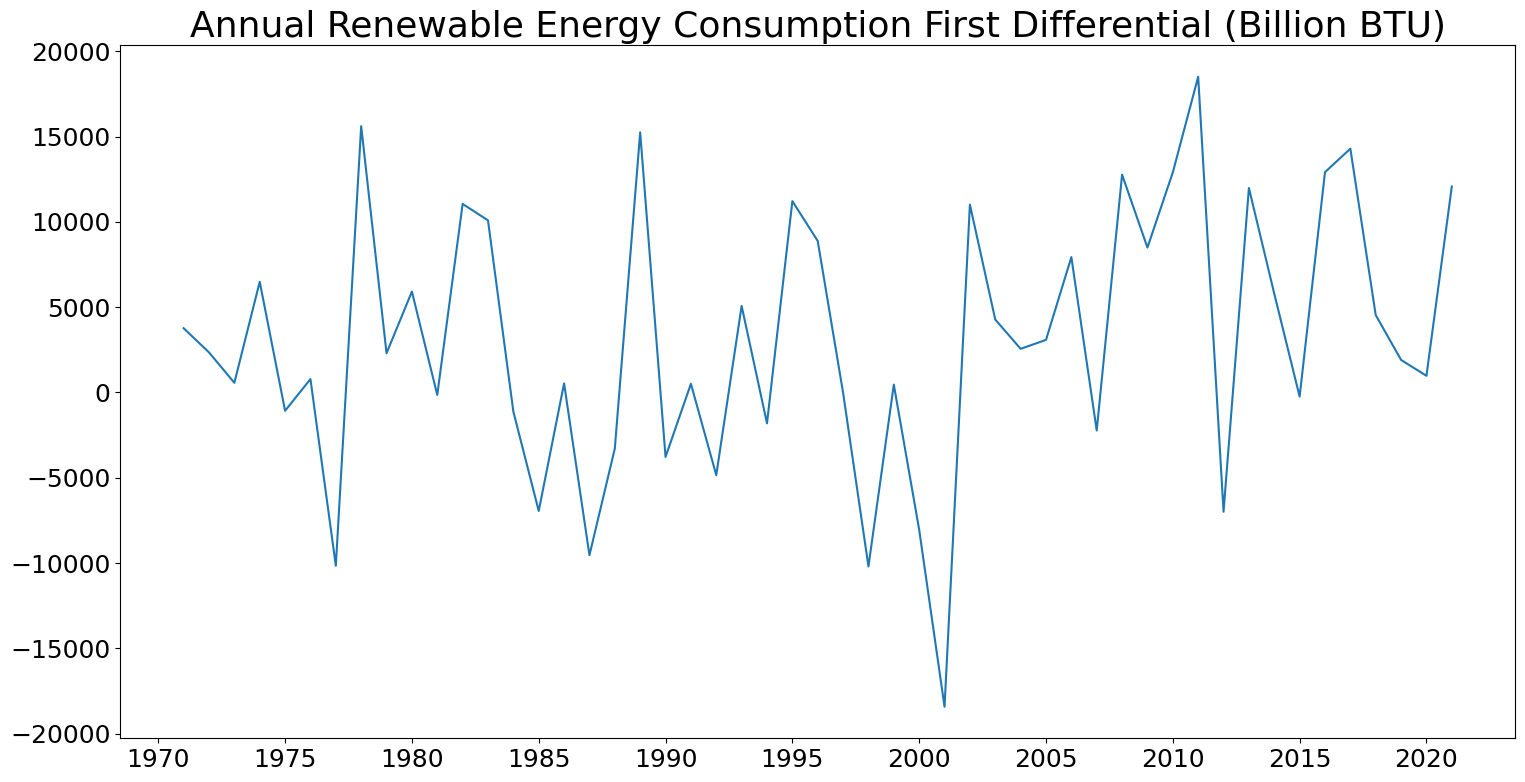

In [63]:
plot_series(df_ts, ['first_diff_Renewable_Energy_Value'], title='Annual Renewable Energy Consumption First Differential (Billion BTU)', steps = 5)


#### Nothing conclusive from plots so we move on to further analysis with Ad Fuller and Modeling

## Ad Fuller Analysis

In [71]:
df_ts.columns

Index(['CO2_Value', 'Coal_Value', 'Natural_Gas_Value', 'Nuclear_Energy_Value',
       'Petroleum_Energy_Value', 'Renewable_Energy_Value',
       'first_diff_CO2_Value', 'second_diff_CO2_Value',
       'first_diff_Coal_Value', 'second_diff_Coal_Value',
       'first_diff_Natural_Gas_Value', 'second_diff_Natural_Gas_Value',
       'first_diff_Nuclear_Energy_Value', 'second_diff_Nuclear_Energy_Value',
       'first_diff_Petroleum_Energy_Value',
       'second_diff_Petroleum_Energy_Value',
       'first_diff_Renewable_Energy_Value',
       'second_diff_Renewable_Energy_Value'],
      dtype='object')

### Interpretation for $\text{CO}_{2}$ 

In [66]:
# Code written by Joseph Nelson.

def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    return dfoutput

In [67]:
interpret_dftest(adfuller(df_ts['CO2_Value']))

Test Statistic   -2.034696
p-value           0.271570
dtype: float64

##### Value for $\alpha$ not less than $0.01$, not stationary so we check first differential. 

In [69]:
interpret_dftest(adfuller(df_ts['first_diff_CO2_Value'].dropna()))

Test Statistic   -3.645985
p-value           0.004940
dtype: float64

##### Value for $\alpha$ less than $0.01$, is stationary for $\text{CO}_{2}$ first differential. 

### Interpretations for Energy Values

In [72]:
interpret_dftest(adfuller(df_ts['Coal_Value']))

Test Statistic   -2.208249
p-value           0.203265
dtype: float64

##### Value for $\alpha$ not less than $0.01$, not stationary so we check first differential. 

In [74]:
interpret_dftest(adfuller(df_ts['first_diff_Coal_Value'].dropna()))

Test Statistic    0.544552
p-value           0.986166
dtype: float64

In [76]:
interpret_dftest(adfuller(df_ts['second_diff_Coal_Value'].dropna()))

Test Statistic   -7.470247e+00
p-value           5.077202e-11
dtype: float64

##### Value for $\alpha$ less than $0.01$, is stationary for coal second differential. 

In [78]:
interpret_dftest(adfuller(df_ts['Natural_Gas_Value']))

Test Statistic    0.945477
p-value           0.993656
dtype: float64

##### Continue process as previously conducted. 

In [79]:
interpret_dftest(adfuller(df_ts['first_diff_Natural_Gas_Value'].dropna()))

Test Statistic   -6.328106e+00
p-value           2.951961e-08
dtype: float64

##### Value for $\alpha$ less than $0.01$, is stationary for Natural Gas first differential. 

In [81]:
interpret_dftest(adfuller(df_ts['Nuclear_Energy_Value']))

Test Statistic   -3.416778
p-value           0.010400
dtype: float64

In [91]:
interpret_dftest(adfuller(df_ts['first_diff_Nuclear_Energy_Value'].dropna()))

Test Statistic   -5.226035
p-value           0.000008
dtype: float64

##### Value for $\alpha$ less than $0.01$, is stationary for Nuclear Energy first differential. 

In [84]:
interpret_dftest(adfuller(df_ts['Petroleum_Energy_Value']))

Test Statistic   -2.486266
p-value           0.118852
dtype: float64

In [85]:
interpret_dftest(adfuller(df_ts['first_diff_Petroleum_Energy_Value'].dropna()))

Test Statistic   -5.332416
p-value           0.000005
dtype: float64

##### Value for $\alpha$ less than $0.01$, is stationary for Petroleum first differential. 

In [87]:
interpret_dftest(adfuller(df_ts['Renewable_Energy_Value']))

Test Statistic    1.130740
p-value           0.995471
dtype: float64

In [88]:
interpret_dftest(adfuller(df_ts['first_diff_Renewable_Energy_Value'].dropna()))

Test Statistic   -6.696366e+00
p-value           3.990237e-09
dtype: float64

##### Value for $\alpha$ less than $0.01$, is stationary for Renewable Energy first differential. 

### Training and ARIMA SARIMA ETC

In [119]:
X_features = ['Coal_Value',	'Natural_Gas_Value','Nuclear_Energy_Value','Petroleum_Energy_Value','Renewable_Energy_Value']

In [120]:
X = df_ts[X_features]
y = df_ts['CO2_Value']

In [121]:
# Create train-test split.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    shuffle = False) # Shuffle = False is IMPORTANT!

In [122]:
# Instantiate model.
model = ARIMA(endog=y_train.astype(float).dropna(),
             order= (0,2,2)) # order (p, d, q)
# Remember that, in statsmodels, we pass our data 
# in when we instantiate the model!


# In the present version of statsmodels, only
# certain values of d are supported.

/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [123]:
# Fit model.
arima_0_2_0 = model.fit()

In [124]:
y_test.head()

Year
2011-01-01    22.596078
2012-01-01    21.717647
2013-01-01    21.923529
2014-01-01    21.937255
2015-01-01    21.182353
Name: CO2_Value, dtype: float64

In [125]:
y_test.tail()

Year
2017-01-01    20.449020
2018-01-01    20.994118
2019-01-01    20.294118
2020-01-01    18.319608
2021-01-01    19.354902
Name: CO2_Value, dtype: float64

In [127]:
preds = arima_0_2_0.predict(start = datetime(2011,1,1), end = datetime(2021,1,1))